<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [72]:
# Answer:

movies = pd.read_csv("./data/imdb_1000.csv")
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [73]:
# Answer:

movies.shape

(979, 6)

#### Check the data type of each column.

In [74]:
# Answer:

movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [75]:
# Answer:

movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [76]:
# Answer:

movies.duration.sort_values()

389     64
338     66
258     67
293     68
88      68
      ... 
445    220
142    224
78     229
157    238
476    242
Name: duration, Length: 979, dtype: int64

#### Create a histogram of duration, choosing an "appropriate" number of bins.

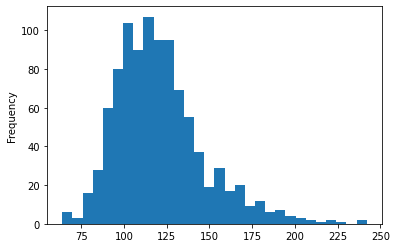

In [77]:
# Answer:

ax = movies.duration.plot.hist(bins=30)

#### Use a box plot to display that same data.

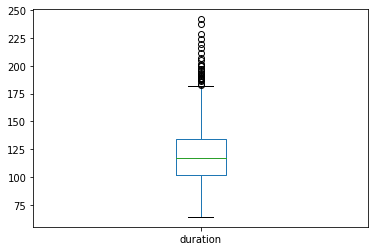

In [78]:
# Answer:

ax = movies.duration.plot.box()

## Intermediate level

#### Count how many movies have each of the content ratings.

In [79]:
# Answer:

movies.content_rating.value_counts(dropna=False)

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
NaN            3
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

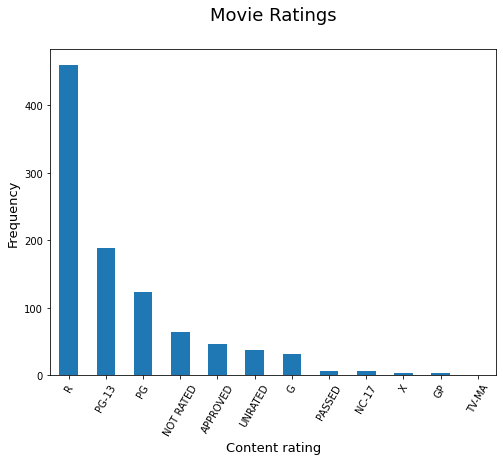

In [80]:
# Answer:
ax = movies.content_rating.value_counts().plot.bar(stacked=True, rot=60, figsize=(8, 6))

ax.set_title('Movie Ratings', fontsize=18, y=1.07)

ax.set_ylabel('Frequency', fontsize=13)

ax.set_xlabel('Content rating', fontsize=13);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [81]:
# Answer:

movies = movies.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

movies.content_rating.value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
NaN          3
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [82]:
# Answer:

movies = movies.replace(['X', 'TV-MA'], 'NC-17')

movies.content_rating.value_counts(dropna=False)

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
NaN          3
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [83]:
# Answer:

movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [84]:
# Answer:

movies[movies.content_rating.isna()]

movies.content_rating = movies.content_rating.fillna('UNRATED')

movies.content_rating.value_counts(dropna=False)

R          460
PG-13      189
UNRATED    163
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [85]:
# Answer:

long_movies = movies[movies.duration >= 120].star_rating.mean()

short_movies = movies[movies.duration < 120].star_rating.mean()

print(long_movies)

print(short_movies)

7.948898678414082
7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

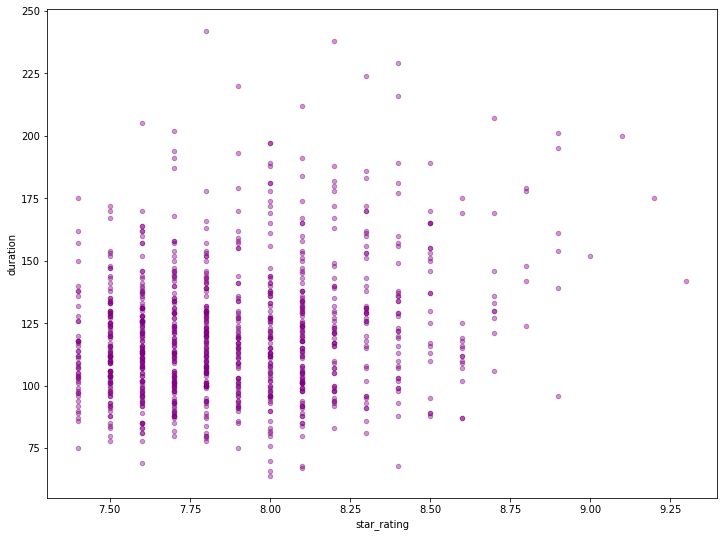

In [86]:
# Answer:

movies.plot.scatter(
        y = 'duration',
        x = 'star_rating',
        figsize= (12, 9),
        alpha=0.4,
        c = 'purple'
);

#### Calculate the average duration for each genre.

In [87]:
# Answer:

movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

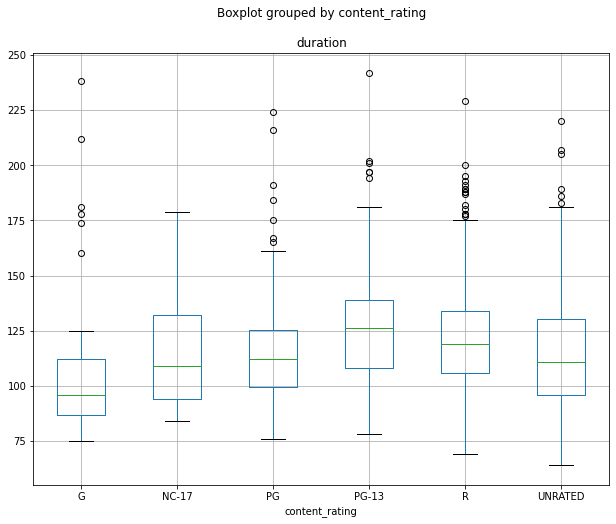

In [88]:
# Answer:

ax = movies.boxplot(column = 'duration', by = 'content_rating', figsize= (10, 8))

#### Find the title of the movie with the highest star rating in each genre

In [89]:
# Answer:

movies.groupby("genre")["star_rating"].max()

top_ratings = movies.loc[:,['title', 'genre', 'star_rating']].groupby('genre').head(1)

top_ratings

,title,genre,star_rating
0,The Shawshank Redemption,Crime,9.3
3,The Dark Knight,Action,9.0
5,12 Angry Men,Drama,8.9
6,"The Good, the Bad and the Ugly",Western,8.9
7,The Lord of the Rings: The Return of the King,Adventure,8.9
8,Schindler's List,Biography,8.9
25,Life Is Beautiful,Comedy,8.6
30,Spirited Away,Animation,8.6
38,Rear Window,Mystery,8.6
39,Psycho,Horror,8.6


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [90]:
# Answer:

movies[movies.duplicated(['title'], False)].sort_values('title')

# Looks like there are 4 movies with same titles but they are not actually duplicates

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


**You only need to choose one of the options below.** However, solving for multiple options would count as "extra credit" that could e.g. raise your score from a 2 ("meets expectations") to a 3 ("exceeds expectations").

#### Option 1: manually create a list of relevant genres, then filter using that list

In [91]:
# Answer:

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [97]:
# Answer:


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [ ]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [98]:
# Answer:

average_rating = movies.groupby('genre').star_rating.agg(['mean', 'count'])

# Filtering using count of at least 10

average_rating[average_rating['count'] >= 10]

,mean,count
genre,,
Action,7.884559,136
Adventure,7.933333,75
Animation,7.914516,62
Biography,7.862338,77
Comedy,7.822436,156
Crime,7.916935,124
Drama,7.902518,278
Horror,7.806897,29
Mystery,7.975000,16


## Bonus

#### Figure out something "interesting" using the actors data!